### household_power_consumption.csv Models

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pandas as pd

In [4]:
df = pd.read_csv('core\static\data\household_power_consumption_processed.csv', sep=',', low_memory=False)
df_datetime = pd.read_csv('core\static\data\household_power_consumption_datetime_processed.csv', sep=',', low_memory=False)
df.isnull().sum()
df_datetime.isnull().sum()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Axel\AppData\Local\Temp\ipykernel_5232\2061319391.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('core\static\data\household_power_consumption_processed.csv', sep=',', low_memory=False)
C:\Users\Axel\AppData\Local\Temp\ipykernel_5232\2061319391.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_datetime = pd.read_csv('core\static\data\household_power_consumption_datetime_processed.csv', sep=',', low_memory=False)


Datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

X = df[['Year', 'Month', 'Day', 'Weekday', 'Hour']]
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear Regression:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Decision Tree Regression:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forest:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

Linear Regression:
mean squared error: 1.0161300098782997
root mean squared error: 1.0080327424634081
r2 score: 0.08437353750557064

Decision Tree Regression:
mean squared error: 0.3201926088686721
root mean squared error: 0.5658556431358374
r2 score: 0.7114770522224828



KeyboardInterrupt: 

## Support Vector Machine

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR, NuSVR, LinearSVR
from math import sqrt

subset_df = df.head(int(len(df) * 0.1))
subset_df_datetime= df_datetime.head(int(len(df_datetime) * 0.1))

X = subset_df[['Year', 'Month', 'Day', 'Weekday', 'Hour']]
y = subset_df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("SVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = NuSVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("NuSVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = LinearSVR(random_state=42, dual="auto", max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("LinearSVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

SVR:
mean squared error: 1.6083436903968689
root mean squared error: 1.268204908678747
r2 score: 0.005018400567125436

NuSVR:
mean squared error: 1.5727541439064692
root mean squared error: 1.2540949501160066
r2 score: 0.027035425971298044

LinearSVR:
mean squared error: 3.1129607611038046
root mean squared error: 1.7643584559561032
r2 score: -0.9257940299380629



C:\Users\Axel\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
df_datetime.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# df_datetime.set_index('Datetime', inplace=True)
# df_datetime = df_datetime.asfreq('min')

## ARIMA

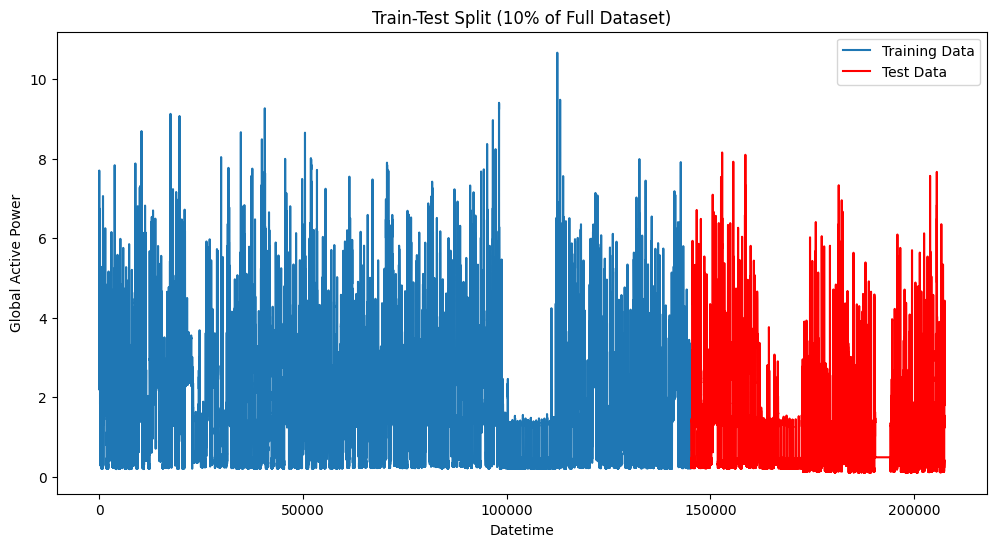

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:               145267
Model:                  ARIMA(5, 1, 0)   Log Likelihood              -55896.473
Date:                 Tue, 11 Jun 2024   AIC                         111804.946
Time:                         00:56:22   BIC                         111864.264
Sample:                              0   HQIC                        111822.650
                              - 145267                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0523      0.001    -44.869      0.000      -0.055      -0.050
ar.L2         -0.2348      0.001   -196.709      0.000      -0.237      -0.232
ar.L3         -0.1516      0.001   -128.794 

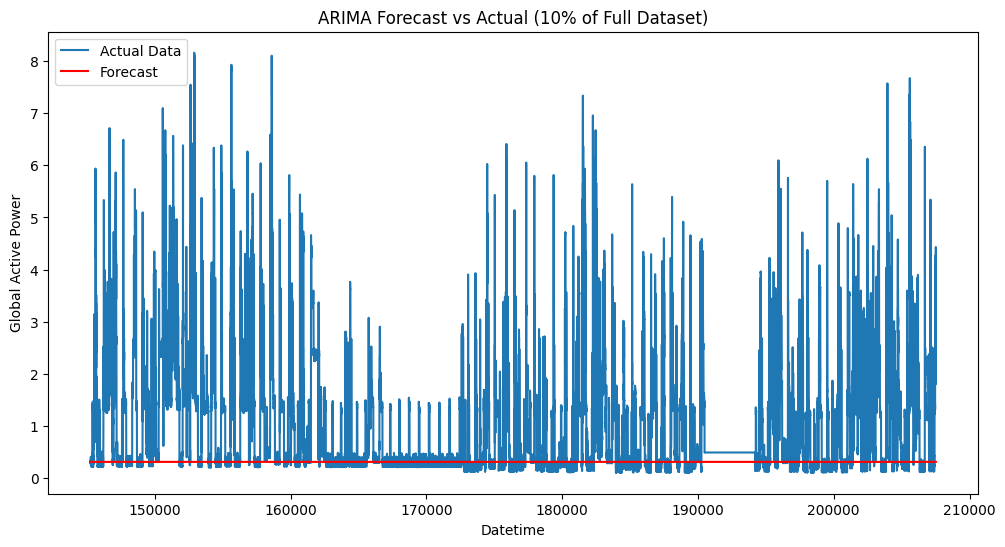

Mean Squared Error: 1.47754467704716


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

subset_df = df_datetime.head(int(len(df_datetime ) * 0.1))

split_ratio = 0.7
split_point = int(len(subset_df) * split_ratio)
train, test = subset_df[:split_point], subset_df[split_point:]

train_series = train['Global_active_power']
test_series = test['Global_active_power']

plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Test Data', color='red')
plt.title('Train-Test Split (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

model = ARIMA(train_series, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Data')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

mse = mean_squared_error(test_series, forecast)
print(f'Mean Squared Error: {mse}')

# ADF Test

De Augmented Dickey-Fuller (ADF)-testresultaten geven aan dat de p-waarde aanzienlijk lager is dan 0,05, wat erop wijst dat de reeks stationair is en geen verdere differentiatie vereist.

Gezien dit alles kunnen we ons concentreren op de andere stappen om de prestaties van het ARIMA-model te verbeteren. Laten we proberen de ARIMA-parameters aan te passen op basis van de ACF- en PACF-grafieken en ervoor te zorgen dat het model de trends effectief vastlegt.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -18.322280581964996
p-value: 2.2645585671964898e-30


# ACF and PACF Plots

De ACF- en PACF-grafieken bieden waardevolle informatie voor het identificeren van de ARIMA-parameters. Zo interpreteert u deze plots:

ACF-plot:

De eerste significante piek bij lag 1 suggereert dat 
𝑞
q kan 1 zijn.
PACF-plot:

De eerste significante piek bij lag 1 suggereert dat 
𝑝
p kan 1 zijn.
Gegeven deze interpretaties kunnen we het ARIMA(1,1,1)-model proberen. Als de resultaten niet bevredigend zijn, kunnen we experimenteren met termen van hogere orde.

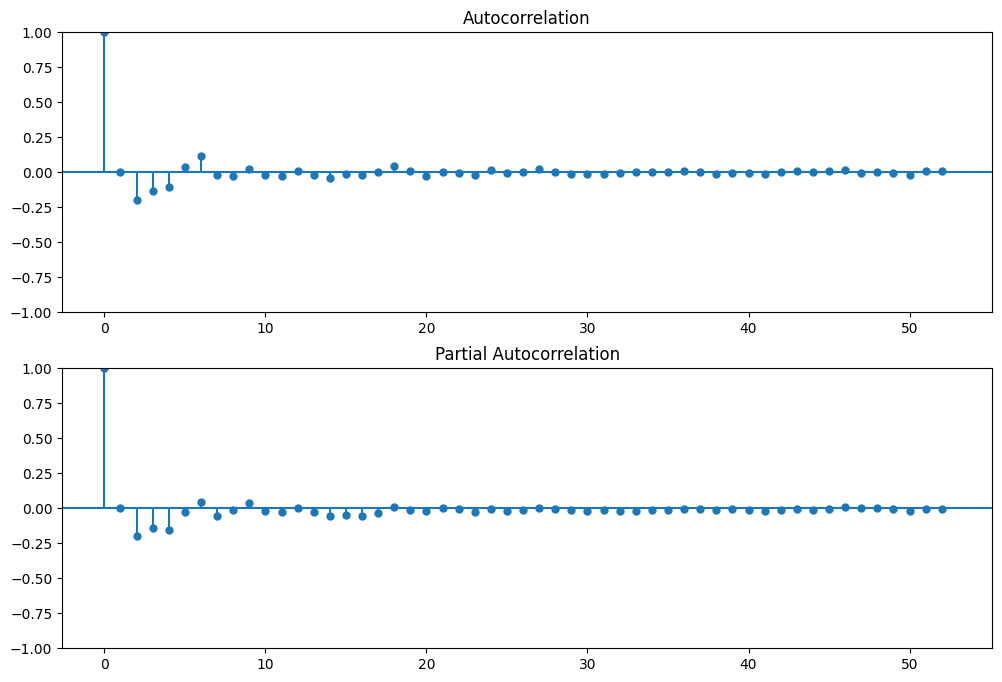

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_series.diff().dropna(), ax=ax[0])
plot_pacf(train_series.diff().dropna(), ax=ax[1])
plt.show()

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:               145267
Model:                  ARIMA(1, 1, 1)   Log Likelihood              -58726.892
Date:                 Tue, 11 Jun 2024   AIC                         117459.784
Time:                         00:57:05   BIC                         117489.443
Sample:                              0   HQIC                        117468.636
                              - 145267                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7610      0.002    370.334      0.000       0.757       0.765
ma.L1         -0.9031      0.002   -589.701      0.000      -0.906      -0.900
sigma2         0.1314      0.000    825.941 

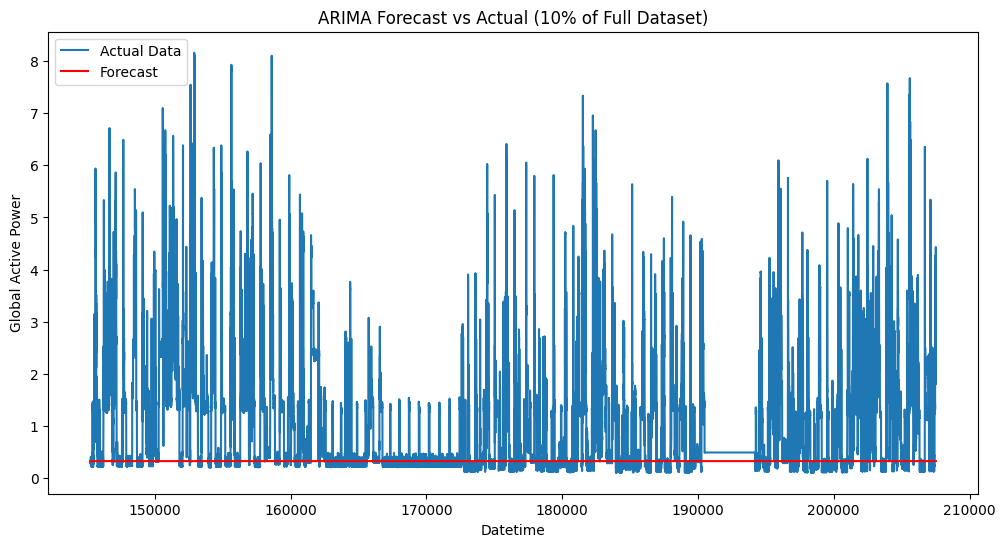

Mean Squared Error: 1.4587727276821634


In [ ]:

model = ARIMA(train_series, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Data')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

mse = mean_squared_error(test_series, forecast)
print(f'Mean Squared Error: {mse}')

In [ ]:
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_series_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1)).flatten()
test_series_scaled = scaler.transform(test_series.values.reshape(-1, 1)).flatten()

# model = auto_arima(train_series_scaled, seasonal=False, trace=True,
#                    error_action='ignore', suppress_warnings=True,
#                    stepwise=True)

# print(model.summary())

# best_order = model.order
# model_fit = ARIMA(train_series_scaled, order=best_order).fit()

# forecast_scaled = model_fit.forecast(steps=len(test_series_scaled))
# forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# plt.figure(figsize=(12, 6))
# plt.plot(test_series.index, test_series, label='Actual Data')
# plt.plot(test_series.index, forecast, label='Forecast', color='red')
# plt.title(f'ARIMA Forecast vs Actual (10% of Full Dataset)')
# plt.xlabel('Datetime')
# plt.ylabel('Global Active Power')
# plt.legend()
# plt.show()

# mse = mean_squared_error(test_series, forecast)
# print(f'Mean Squared Error: {mse}')

## GRU
GRU (gated Recurrent Unit) is een type neuraal netwerk speciaal ontworpen voor het verwerken van sequentiele data. Het is een variant van LSTM(Long Short-Term Memory) waar later nog naar gekeken word. GRU gaat in theorie beter om met lange-termijnafhankelijkheden.

Voorbeelden van toepassing:
- Taalmodelleren en Tekstgeneratie
- Tijdreeksvoorspelling
- Spraakherkenning
- Machinevertalen

Tijdreeksvoorspelling komt ter sprake in dit geval

Num GPUs Available:  1


C:\Users\oscar\AppData\Local\Temp\ipykernel_21164\461821383.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GRU['Datetime'] = pd.to_datetime(df_GRU['Datetime'])
C:\Users\oscar\AppData\Local\Temp\ipykernel_21164\461821383.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_GRU = df_GRU.fillna(method='ffill')


1890/1890 [==============================] - 114s 60ms/step
Mean Squared Error: 1.021886760609016


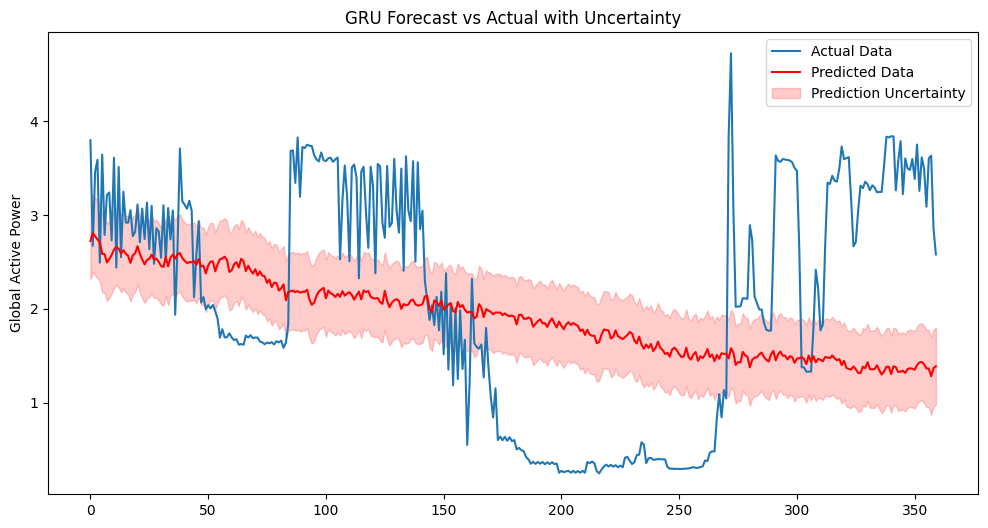

In [4]:
import tensorflow as tf
# Will use GPU if possible, using anaconda is nice
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

n_sequence_past = 1440  # minutes N sequence
n_ahead_prediction = 360  # minutes N ahead

# Load the data
df_GRU = pd.read_csv('core/static/data/household_power_consumption_datetime_processed.csv', sep=',', low_memory=False)
subset_df = df_GRU.head(int(len(df_GRU) * 0.1))
df_GRU = subset_df[['Datetime', 'Global_active_power']]
df_GRU['Datetime'] = pd.to_datetime(df_GRU['Datetime'])
df_GRU.set_index('Datetime', inplace=True)
df_GRU = df_GRU.asfreq('min')
df_GRU = df_GRU.fillna(method='ffill')

split_ratio = 0.7
split_point = int(len(df_GRU) * split_ratio)
train, test = df_GRU[:split_point], df_GRU[split_point:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

def create_sequences(data, seq_length, prediction_length):
    X, y = [], []
    for i in range(len(data) - seq_length - prediction_length + 1):
        seq = data[i:(i + seq_length)]
        label = data[(i + seq_length):(i + seq_length + prediction_length)]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

seq_length = n_sequence_past
prediction_length = n_ahead_prediction
X_train, y_train = create_sequences(train_scaled, seq_length, prediction_length)
X_test, y_test = create_sequences(test_scaled, seq_length, prediction_length)

model = Sequential([
    GRU(40, return_sequences=True, input_shape=(seq_length, 1)),
    GRU(40),
    Dense(prediction_length)
])
model.compile(optimizer='adam', loss='mse')

# If gpu present it will use it
model.fit(X_train, y_train, epochs=1, batch_size=64)

y_pred = model.predict(X_test)

# Reshape y_test and y_pred for inverse transformation and evaluation
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

y_test_inv = scaler.inverse_transform(y_test_reshaped)
y_pred_inv = scaler.inverse_transform(y_pred_reshaped)

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:n_ahead_prediction], label='Actual Data')
plt.plot(y_pred_inv[:n_ahead_prediction], label='Predicted Data', color='red')
uncertainty = np.std(y_pred_inv[:n_ahead_prediction])

plt.fill_between(range(n_ahead_prediction), 
                 (y_pred_inv[:n_ahead_prediction].flatten() - uncertainty), 
                 (y_pred_inv[:n_ahead_prediction].flatten() + uncertainty), 
                 color='red', alpha=0.2, label='Prediction Uncertainty')

plt.title('GRU Forecast vs Actual with Uncertainty')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

## LSTM

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

subset_df = df.head(int(len(df) * 0.1))
subset_df_datetime = df_datetime.head(int(len(df_datetime) * 0.1))

X = subset_df[['Year', 'Month', 'Day', 'Weekday', 'Hour']].values
y = subset_df['Global_active_power'].values

timesteps = 1
X = X.reshape((X.shape[0], timesteps, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test)

print("LSTM:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

Epoch 1/50


C:\Users\Axel\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5189/5189 ━━━━━━━━━━━━━━━━━━━━ 4s 632us/step - loss: 225.2205
Epoch 2/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 608us/step - loss: 1.5127
Epoch 3/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 592us/step - loss: 1.5367
Epoch 4/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step - loss: 1.5106
Epoch 5/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 622us/step - loss: 1.5035
Epoch 6/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 630us/step - loss: 1.5022
Epoch 7/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 602us/step - loss: 1.4925
Epoch 8/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 635us/step - loss: 1.4740
Epoch 9/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 654us/step - loss: 1.4749
Epoch 10/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 609us/step - loss: 1.4427
Epoch 11/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 583us/step - loss: 1.4467
Epoch 12/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 586us/step - loss: 1.4553
Epoch 13/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step - loss: 1.4478
Epoch 14/50
5189/5189 ━━━━━━━━━━━━━━━━━━━━ 3s 596us/step - loss: 1.4531
Epoch 15/5